In [ ]:
!sudo pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:21
🔁 Restarting kernel...


In [ ]:
import numpy as np
import networkx as nx

**Не забывайте проверять связи внутри ваших данных!**

К примеру, представим, у нас задача кредитного скоринга. 

Есть Петя, у Пети плохая кредитная история, было много задолженностей. Одобрим ли мы кредит Пете? Скорее всего нет. 

А ещё у Пети есть жена Света, она тоже клиент нашего банка. Хорошая КИ, брала несколько крупных кредитов, всё вернула, задолженностей не было. 

Мы с вами понимаем, что выплачивать кредит они будут вместе, а значит Пете скор можно и поднять, но на сколько? И какой алгоритм для этого применить?

В принципе, тут можно было бы взять деревья. Но а что если мы захотим использовать информацию о других родственниках? У нас не будет информации по всей родне каждого человека. Или у нас вообще не скоринг, а рекомендательная система в соц. сети и мы хотим предлагать рекламу на основании интересов друзей? 

Для таких задач нам нужно работать с графами.

**NetworkX**

Для начала давайте раберёмся, что такое граф.

Граф можно определить как G = (V, E), где V — набор узлов, а E — список ребер.

Давайте представим наших Петю и Свету в виде графа с помощью NetworkX.

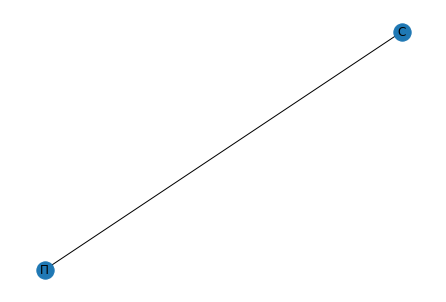

In [ ]:
g = nx.Graph()
g.add_node('П')
g.add_node('С')
g.add_edge('П','С')
nx.draw(g, with_labels=True)

Вершины — это точки данных, наши Петя и Света, а связь между ними задана ребром.

В данном примере мы создали пустой граф, а потом добавили поочередно вершины и ребро между ними, но в NetworkX есть возможность добавлять сразу несколько вершин или рёбер.

Давайте добавим к семье ещё двух взрослых детей, Витю и Лену.

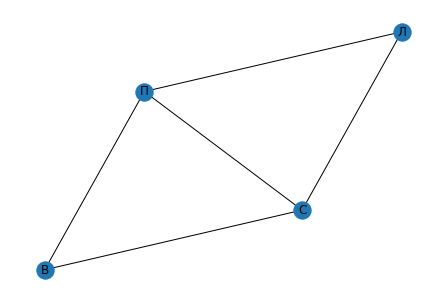

In [ ]:
g.add_nodes_from(['В','Л'])
g.add_edges_from([('В','П'),('В','С'),('Л','П'),('Л','С')])
nx.draw(g, with_labels=True)

Рекомендую использовать этот способ, так и удобнее и быстрее для больших графов.

Граф мы создали, но у нас всё ещё нет фичей. Давайте добавим их.

Добавим сумму выплаченных кредитов и их количество.

Удобно добавить атрибуты к вершинам можно с помощью функции set_node_attributes. Она принимает на вход словарь словарей и транспонированный DataFrame в качестве такого сгодится.

In [ ]:
import pandas as pd
feat = {'П':{'sum':2000000,'count':10},
        'С':{'sum':1000000,'count':4},
        'В':{'sum':40000,'count':1},
        'Л':{'sum':0,'count':0},}

feat = pd.DataFrame(feat).T
feat

,sum,count
П,2000000,10
С,1000000,4
В,40000,1
Л,0,0


In [ ]:
nx.set_node_attributes(g, feat.T)

In [ ]:
g.nodes.data()

NodeDataView({'П': {'sum': 2000000, 'count': 10}, 'С': {'sum': 1000000, 'count': 4}, 'В': {'sum': 40000, 'count': 1}, 'Л': {'sum': 0, 'count': 0}})

Так, что такое граф разобрались, как фичи добавлять знаем, а как это использовать в ML?

Есть два способа, графовые алгоритмы и графовые нейронные сети. Здесь мы рассмотрим первый способ, а поможет нам с этим швейцарский нож для графов библиотека karate-club.

**Karate-club**

Karate-club простая либа с sklearn-подобным API. Ставится через conda или pip, лучше через conda с pip могут быть проблемы.

In [ ]:
!conda install karateclub > _

Будем разбираться на примере Node2Vec. 

Как вы наверное уже догадались он преобразует вершины в эмбендинги. Как он это делает? Как и большинство графовых алгоритмов, Node2Vec получает структурную информацию из случайных блужданий по графу. Ну или не совсем случайных, поскольку вероятность вероятность перехода на новую вершину и уже посещённую регулируемы. При блужданиях создаётся последовательность из вершин, на которой уже модель Skip-Gram обучается угадывать пропуски в вершинах, так же как в тексте word2vec пытается угадывать пропуски слов.

Подгружаем данные.

In [ ]:
from karateclub import GraphReader

reader = GraphReader("wikipedia")

wiki = reader.get_graph()

Создаём модель. У Node2Vec есть много параметров, таких как количество и длина случайных блужданий, количество эпох и т.д., но нам интересен больше всего параметр dimensions, это размерность наших эмбендингов. Сделаем его для примера равным 64.

In [ ]:
from karateclub import Node2Vec
n2v = Node2Vec(dimensions=64)

In [ ]:
n2v.fit(wiki)
embedding = n2v.get_embedding()
embedding.shape

KeyboardInterrupt: ignored

Вот и всё мы получили эмбендинги.


В заключение хочется сказать, что хоть и Node2Vec неплохой алгоритм, но он появился аж в 16-ом году, а в karate-club есть алгоритмы и посвежее, так что, если Node2Vec поднимает вас на LB, пробуйте новое, не бойтесь экспериментировать.

И не стесняйтесь заглянуть в доку к NetworkX и karate-club за подробностями, они довольно подробные и хорошо написаны. 
https://networkx.org/documentation/stable/tutorial.html

https://karateclub.readthedocs.io/en/latest/index.html